In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchaudio
import torch
import numpy as np
import pandas as pd
import os
import pickle
import re
import torchaudio.transforms as T
import math
import librosa
import librosa.display
import matplotlib.patches as patches
from glob import glob
import util
from util import audio_file
from util import *
from Losses import FocalLoss,WeightedFocalLoss
from StackedLSTM2 import StackedLSTM
from AttentionLSTM import Attention_LSTM
from Toy_Model import ToyModel
import time
torch.manual_seed(1)

input_list, labels_list = load_data_limit(2)
n_samples = input_list.size()[0]
train_split = 4*n_samples//5
test_samples = n_samples - train_split
test_input_list = input_list[train_split:]
test_labels_list = labels_list[train_split:]
input_list = input_list[:train_split]
labels_list = labels_list[:train_split]
input_list.shape
print("done")

0
(180600,)
1
(180600,)
2
done


In [2]:
input_list.shape
my_model = "Vanilla_LSTM"
verbose=1

if my_model == "Attention_LSTM":
    model = Attention_LSTM()
    save_filepath = '/project/graziul/ra/ajays/LSTM_model_predictions.txt'
elif my_model == "Vanilla_LSTM":
    model = ToyModel()
    save_filepath = '/project/graziul/ra/ajays/toy_model_predictions.txt'
loss_fn = FocalLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
fer_list = []
train_loss_list = []
test_loss_list = []
sample_size = 30
batch_size = model.batch_size
num_samples = input_list.size()[0]//batch_size
training_steps = 100
idx = 0
flag = 0
num_segments = 30
val_size = 30

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [8]:
for step in range(training_steps):
    start_time = time.time()
    input_batch = input_list[idx*batch_size:(idx+1)*batch_size]
    labels_batch = labels_list[idx*batch_size:(idx+1)*batch_size]
    idx = (idx+1)%num_samples
    print(step)
    optimizer.zero_grad()
    output_hat = model(input_batch)
    #print(output_hat)
    print(labels_batch)
    print(output_hat)
    loss = loss_fn(output_hat, labels_batch)
    loss.backward()
    #for param in model.parameters():
    #    print(param.grad)
    print(loss)
    train_loss_list.append(loss.item())
    optimizer.step()
    end_time = time.time()
    step_time = end_time - start_time
    print("Time Taken for Step = " + str(step_time))

0
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]])
tensor([[0.0127, 0.0019, 0.0010,  ..., 0.4952, 0.4952, 0.4952],
        [0.1276, 0.4825, 0.4993,  ..., 0.0008, 0.0008, 0.0008]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7908, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.12955641746521
1
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0156, 0.0024, 0.0013,  ..., 0.4933, 0.4933, 0.4933],
        [0.0163, 0.0024, 0.0013,  ..., 0.0010, 0.0010, 0.0010]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7587, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.0940701961517334
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0234, 0.0041, 0.0023,  ..., 0.0018, 0.0018, 0.0018],
        [0.0231, 0.0040, 0.0022,  ..., 0.0018, 0.0018, 0.0018]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0018, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.1109967231750488
3
tensor([[0., 0.,

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0239, 0.0042, 0.0022,  ..., 0.0017, 0.0017, 0.0017],
        [0.0214, 0.0039, 0.0021,  ..., 0.0017, 0.0017, 0.0017]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0017, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.3839890956878662
26
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0214, 0.0036, 0.0019,  ..., 0.0014, 0.0014, 0.0014],
        [0.0194, 0.0035, 0.0018,  ..., 0.0014, 0.0014, 0.0014]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0015, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.4264755249023438
27
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0192, 0.0031, 0.0016,  ..., 0.0012, 0.0012, 0.0012],
        [0.0173, 0.0030, 0.0016,  ..., 0.0012, 0.0012, 0.0012]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0013, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.2951383590698242
28
tensor([[0., 

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]])
tensor([[0.1574, 0.0929, 0.0764,  ..., 0.3817, 0.3817, 0.3817],
        [0.1822, 0.3931, 0.3865,  ..., 0.3817, 0.3817, 0.3817]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7430, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.1264150142669678
51
tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]])
tensor([[0.3992, 0.4179, 0.4152,  ..., 0.4135, 0.4135, 0.4135],
        [0.2299, 0.4193, 0.4158,  ..., 0.4135, 0.4135, 0.4135]],
       grad_fn=<SqueezeBackward0>)
tensor(0.6952, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.136214256286621
52
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.2631, 0.2022, 0.1831,  ..., 0.1748, 0.1748, 0.1748],
        [0.2810, 0.2048, 0.1829,  ..., 0.1747, 0.1747, 0.1747]],
       grad_fn=<SqueezeBackward0>)
tensor(0.1923, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.087109088897705
53
tensor([[0., 0.

tensor(0.2791, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.068554401397705
74
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.4644e-04, 4.7903e-06, 1.7084e-06,  ..., 1.1584e-06, 1.1584e-06,
         1.1584e-06],
        [8.6098e-04, 1.0969e-05, 2.0703e-06,  ..., 1.1583e-06, 1.1583e-06,
         1.1583e-06]], grad_fn=<SqueezeBackward0>)
tensor(1.9810e-06, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.0831470489501953
75
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.5083e-04, 5.1146e-06, 1.8389e-06,  ..., 1.2483e-06, 1.2483e-06,
         1.2483e-06],
        [1.0304e-03, 1.2758e-05, 2.2833e-06,  ..., 1.2482e-06, 1.2482e-06,
         1.2482e-06]], grad_fn=<SqueezeBackward0>)
tensor(2.2457e-06, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.2279284000396729
76
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.5570e-04, 5.4394e-06, 1.9681e-06,  ..., 1

tensor(0.0137, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.0598669052124023
96
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0533, 0.0263, 0.0212,  ..., 0.0195, 0.0192, 0.0190],
        [0.0906, 0.0381, 0.0233,  ..., 0.0192, 0.0192, 0.0192]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0197, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.0446040630340576
97
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.0591, 0.0305, 0.0247,  ..., 0.0226, 0.0226, 0.0226],
        [0.0947, 0.0420, 0.0267,  ..., 0.3236, 0.3236, 0.3236]],
       grad_fn=<SqueezeBackward0>)
tensor(0.2063, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.0391952991485596
98
tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.3048, 0.3274, 0.3282,  ..., 0.3281, 0.3281, 0.3281],
        [0.0967, 0.0442, 0.0283,  ..., 0.0235, 0.0234, 0.0234]],
       grad_fn=<SqueezeBackward0>)
tensor(0.4103

0
1
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.4999, 0.5049, 0.5049,  ..., 0.5111, 0.5111, 0.5111],
        [0.4777, 0.4915, 0.4995,  ..., 0.5112, 0.5112, 0.5112]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7155, grad_fn=<MeanBackward0>)
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.4662, 0.4402, 0.4228,  ..., 0.4086, 0.4086, 0.4086],
        [0.4138, 0.4210, 0.4231,  ..., 0.4077, 0.4076, 0.4076]],
       grad_fn=<SqueezeBackward0>)
tensor(0.5247, grad_fn=<MeanBackward0>)
3
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.3831, 0.3250, 0.2767,  ..., 0.1259, 0.1259, 0.1259],
        [0.3357, 0.3285, 0.3132,  ..., 0.1260, 0.1260, 0.1260]],
       grad_fn=<SqueezeBackward0>)
tensor(0.1372, grad_fn=<MeanBackward0>)
4
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.2480, 0.1557, 0.0767,  ..., 0.0035, 0.0035,

tensor(1.1738e-07, grad_fn=<MeanBackward0>)
26
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.1108e-04, 2.2370e-12, 1.1182e-18,  ..., 6.4505e-20, 6.4505e-20,
         6.4505e-20],
        [3.2288e-04, 1.0424e-12, 1.1509e-18,  ..., 6.4505e-20, 6.4505e-20,
         6.4505e-20]], grad_fn=<SqueezeBackward0>)
tensor(3.6050e-07, grad_fn=<MeanBackward0>)
27
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.5468e-04, 3.5891e-12, 8.8323e-19,  ..., 4.3279e-20, 4.3279e-20,
         4.3279e-20],
        [1.0157e-03, 6.8530e-12, 1.2353e-18,  ..., 4.3279e-20, 4.3279e-20,
         4.3279e-20]], grad_fn=<SqueezeBackward0>)
tensor(9.7248e-07, grad_fn=<MeanBackward0>)
28
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[2.0747e-04, 5.4752e-12, 7.1310e-19,  ..., 3.0041e-20, 3.0041e-20,
         3.0041e-20],
        [2.3368e-03, 3.6572e-11, 1.3484e-18,  ..., 3.0041e-20, 3.0041e-20

tensor(12.3647, grad_fn=<MeanBackward0>)
50
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[9.8889e-01, 3.9844e-01, 6.2102e-01,  ..., 1.5646e-19, 1.5646e-19,
         1.5646e-19],
        [2.1023e-05, 4.0594e-14, 1.0556e-18,  ..., 1.5646e-19, 1.5646e-19,
         1.5646e-19]], grad_fn=<SqueezeBackward0>)
tensor(0.0050, grad_fn=<MeanBackward0>)
51
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[9.7445e-01, 3.8571e-01, 7.1184e-01,  ..., 2.9330e-19, 2.9330e-19,
         2.9330e-19],
        [2.7793e-05, 6.3242e-14, 1.9117e-18,  ..., 2.9330e-19, 2.9330e-19,
         2.9330e-19]], grad_fn=<SqueezeBackward0>)
tensor(8.5462, grad_fn=<MeanBackward0>)
52
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[9.3291e-01, 2.9983e-01, 2.3512e-01,  ..., 5.4526e-19, 5.4526e-19,
         5.4526e-19],
        [3.6649e-05, 1.0071e-13, 3.4471e-18,  ..., 5.4526e-19, 5.4526e-19,
         

tensor(0.1103, grad_fn=<MeanBackward0>)
74
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[2.1331e-01, 1.7642e-01, 1.5837e-01,  ..., 1.5690e-01, 1.5690e-01,
         1.5690e-01],
        [2.9368e-02, 1.1464e-05, 9.1359e-08,  ..., 3.1825e-08, 3.1825e-08,
         3.1825e-08]], grad_fn=<SqueezeBackward0>)
tensor(0.0854, grad_fn=<MeanBackward0>)
75
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[1.4455e-01, 1.2792e-01, 1.1406e-01,  ..., 1.1340e-01, 1.1340e-01,
         1.1340e-01],
        [3.2880e-02, 1.8075e-05, 2.0777e-07,  ..., 7.8646e-08, 7.8646e-08,
         7.8646e-08]], grad_fn=<SqueezeBackward0>)
tensor(0.0603, grad_fn=<MeanBackward0>)
76
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[9.7264e-02, 8.5356e-02, 7.6017e-02,  ..., 7.5586e-02, 7.5586e-02,
         7.5586e-02],
        [3.5407e-02, 2.5626e-05, 3.9011e-07,  ..., 1.5713e-07, 1.5713e-07,
         1

tensor(0.0156, grad_fn=<MeanBackward0>)
99
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[5.2429e-02, 3.3836e-02, 3.0190e-02,  ..., 2.8834e-02, 2.8834e-02,
         2.8834e-02],
        [6.7533e-04, 2.9578e-09, 1.7657e-12,  ..., 2.6341e-13, 2.6341e-13,
         2.6341e-13]], grad_fn=<SqueezeBackward0>)
tensor(0.0147, grad_fn=<MeanBackward0>)
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
FER = [tensor(0.), tensor(50.6645), tensor(34.3854), tensor(0.), tensor(22.9236), tensor(71.0963), tensor(11.9601), tensor(29.4020), tensor(89.5349), tensor(36.5448), tensor(8.3056), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(29.0698), tensor(54.8173), tensor(0.), tensor(0.), tensor(0.), tensor(0.)], False_Positives = 0, False Negatives = 2641



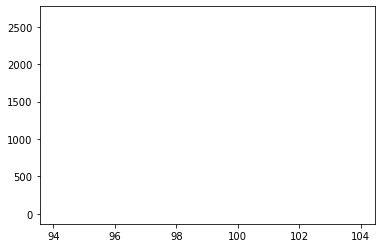

1
0
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.5115, 0.5113, 0.5129,  ..., 0.5180, 0.5180, 0.5180],
        [0.5204, 0.5189, 0.5164,  ..., 0.5178, 0.5178, 0.5178]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7115, grad_fn=<MeanBackward0>)
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.4101, 0.4017, 0.3924,  ..., 0.3609, 0.3612, 0.3614],
        [0.3745, 0.3762, 0.3744,  ..., 0.3615, 0.3615, 0.3614]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7148, grad_fn=<MeanBackward0>)
3
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.4126, 0.4281, 0.4326,  ..., 0.4332, 0.4332, 0.4332],
        [0.3642, 0.3937, 0.4107,  ..., 0.4366, 0.4366, 0.4366]],
       grad_fn=<SqueezeBackward0>)
tensor(0.6226, grad_fn=<MeanBackward0>)
4
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]])
tensor([[0.3551, 0.3804, 0.3825,  ..., 0.4087, 0.4087,

tensor(0.0704, grad_fn=<MeanBackward0>)
28
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1896, 0.0770, 0.0497,  ..., 0.0449, 0.0449, 0.0449],
        [0.3877, 0.4538, 0.4852,  ..., 0.0449, 0.0449, 0.0449]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0477, grad_fn=<MeanBackward0>)
29
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1586, 0.0537, 0.0327,  ..., 0.0292, 0.0292, 0.0292],
        [0.3787, 0.4519, 0.4879,  ..., 0.0292, 0.0292, 0.0292]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0314, grad_fn=<MeanBackward0>)
30
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1301, 0.0364, 0.0210,  ..., 0.0185, 0.0185, 0.0185],
        [0.3684, 0.4491, 0.4914,  ..., 0.0185, 0.0185, 0.0185]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0203, grad_fn=<MeanBackward0>)
31
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1

tensor(0.0918, grad_fn=<MeanBackward0>)
56
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.2378, 0.1077, 0.0813,  ..., 0.0773, 0.0773, 0.0773],
        [0.4993, 0.4865, 0.4628,  ..., 0.0772, 0.0772, 0.0772]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
57
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.2170, 0.0888, 0.0652,  ..., 0.0613, 0.0613, 0.0613],
        [0.5094, 0.4958, 0.4337,  ..., 0.0612, 0.0612, 0.0612]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0649, grad_fn=<MeanBackward0>)
58
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1899, 0.0677, 0.0479,  ..., 0.0445, 0.0445, 0.0445],
        [0.5130, 0.5020, 0.3771,  ..., 0.0445, 0.0445, 0.0445]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0472, grad_fn=<MeanBackward0>)
59
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.1

tensor(0.4795, grad_fn=<MeanBackward0>)
85
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.]])
tensor([[0.0328, 0.0059, 0.0041,  ..., 0.5043, 0.5043, 0.5043],
        [0.2742, 0.4529, 0.4926,  ..., 0.0038, 0.0038, 0.0038]],
       grad_fn=<SqueezeBackward0>)
tensor(0.9097, grad_fn=<MeanBackward0>)
86
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0369, 0.0070, 0.0048,  ..., 0.0045, 0.0045, 0.0045],
        [0.2761, 0.1007, 0.0084,  ..., 0.0045, 0.0045, 0.0045]],
       grad_fn=<SqueezeBackward0>)
tensor(0.5939, grad_fn=<MeanBackward0>)
87
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0457, 0.0099, 0.0071,  ..., 0.0066, 0.0066, 0.0066],
        [0.2821, 0.1086, 0.0115,  ..., 0.0066, 0.0066, 0.0066]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0070, grad_fn=<MeanBackward0>)
88
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0

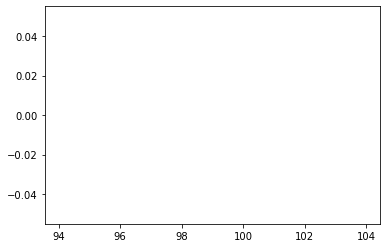

2
0
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.4599, 0.4612, 0.4661,  ..., 0.4702, 0.4702, 0.4702],
        [0.4672, 0.4647, 0.4642,  ..., 0.4702, 0.4702, 0.4702]],
       grad_fn=<SqueezeBackward0>)
tensor(0.6654, grad_fn=<MeanBackward0>)
1
tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.4107, 0.3943, 0.3803,  ..., 0.3592, 0.3592, 0.3592],
        [0.4178, 0.3941, 0.3773,  ..., 0.3594, 0.3594, 0.3594]],
       grad_fn=<SqueezeBackward0>)
tensor(0.5442, grad_fn=<MeanBackward0>)
3
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.3667, 0.3085, 0.2529,  ..., 0.0471, 0.0471, 0.0471],
        [0.3304, 0.2806, 0.2329,  ..., 0.1017, 0.1019, 0.1020]],
       grad_fn=<SqueezeBackward0>)


In [ ]:
#preds_file = open(save_filepath,'w')
#preds_file.truncate(0)

for val_index in range(num_samples):
    #model = StackedLSTM()
    #model = Attention_LSTM()
    if my_model == "Attention_LSTM":
        model = Attention_LSTM()
    elif my_model == "Vanilla_LSTM":
        model = ToyModel()
    #model = nn.DataParallel(model)
    loss_fn = FocalLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    test_data = input_list[val_index*val_size:(val_index+1)*val_size] 
    test_labels = labels_list[val_index*val_size:(val_index+1)*val_size]
    train_data = torch.cat([input_list[:val_index*val_size], input_list[(val_index+1)*val_size:]], dim = 0)
    train_labels = torch.cat([labels_list[:val_index*val_size], labels_list[(val_index+1)*val_size:]], dim = 0)
    print(val_index)
    steps_list = []
    fp_list = []
    fn_list = []
    fer_avg_list = []
    idx = 0
    for step in range(training_steps):
        if(idx != val_index):
            input_batch = train_data[idx*batch_size:(idx+1)*batch_size]
            labels_batch = train_labels[idx*batch_size:(idx+1)*batch_size]
            if(input_batch.size()[0] != 0):
                print(step)
                optimizer.zero_grad()
                output_hat = model(input_batch)
                print(labels_batch)
                print(output_hat)
                loss = loss_fn(output_hat, labels_batch)
                loss.backward()
                #for param in model.parameters():
                #    print(param.grad)
                print(loss)
                optimizer.step()
        idx = (idx+1)%num_samples
    with torch.no_grad():
        if (test_data.size()[0] != 0):
            preds = get_predictions(model,test_data, test_labels, batch_size)  
            fer_value = get_frame_error_rate(torch.round(preds),test_labels, verbose)
            if verbose == 0:
                fer = str(fer_value) + "\n"
            else:
                fer_sum = np.mean(np.array(fer_value[0]))
                fp_sum = np.sum(np.array(fer_value[1]))
                fn_sum = np.sum(np.array(fer_value[2]))
                fer = "FER = " + str(fer_value[0]) + ", False_Positives = " + str(fp_sum) + ", False Negatives = " + str(fn_sum) + "\n"
                steps_list.append(step)
                fp_list.append(fp_sum)
                fn_list.append(fn_sum)
                fer_avg_list.append(fer_sum)
            print(fer)
        plt.plot(steps_list, fer_avg_list, c = 'g')
        plt.plot(steps_list, fp_list, c = 'b')
        plt.plot(steps_list, fn_list, c = 'r')
        plt.show()
            
            #preds_file.write(fer)
#preds_file.close()

